In [1]:
import numpy as np
import pandas as pd
import scipy.signal as sig
import scipy.stats as stat
import matplotlib.pyplot as plt
%matplotlib widget

In [2]:
valonDf = pd.read_pickle('valonCh2_2480MHz_0dBm_10sScanTime_10ksScantime_0dBm_1HzRBW_801pts_801MHzSpan.pkl')
dsgDf = pd.read_pickle('DSG830_24799MHz_0dBm_10sScanTime_10ksScantime_0dBm_1HzRBW_801pts_801MHzSpan.pkl')
valon12hrDf = pd.read_pickle('valonCh2_2480MHz_0dBm_10sScanTime_42ksScantime_0dBm_1HzRBW_801pts_801MHzSpan.pkl')


Text(0.5, 1.0, 'Single Scan')

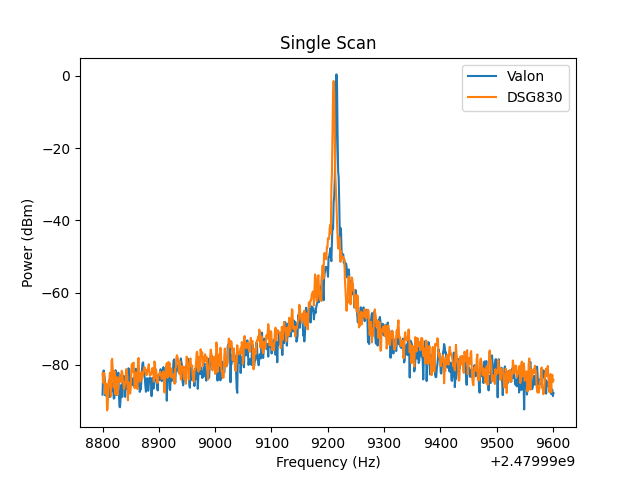

In [48]:
#Single scan
plt.figure()
valonDf.iloc[:, 100].plot(label = 'Valon')
dsgDf.iloc[:, 100].plot(label = 'DSG830')
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (dBm)')
plt.title('Single Scan')

In [64]:
valonClockStd = np.zeros(1000)
dsgClockStd = np.zeros(1000)
for i in range(1000):
    valonClockStd[i] = valonDf.iloc[:,i].std()
    dsgClockStd[i] = dsgDf.iloc[:,i].std()
print('mean of Valon Clock STDs =', round(valonClockStd.mean(), 3), 'Hz')
print('mean of DSG Clock STDs =', round(dsgClockStd.mean(), 3), 'Hz')

mean of Valon Clock STDs = 11.103 Hz
mean of DSG Clock STDs = 11.101 Hz


Text(0.5, 1.0, 'All Curves (Valon)')

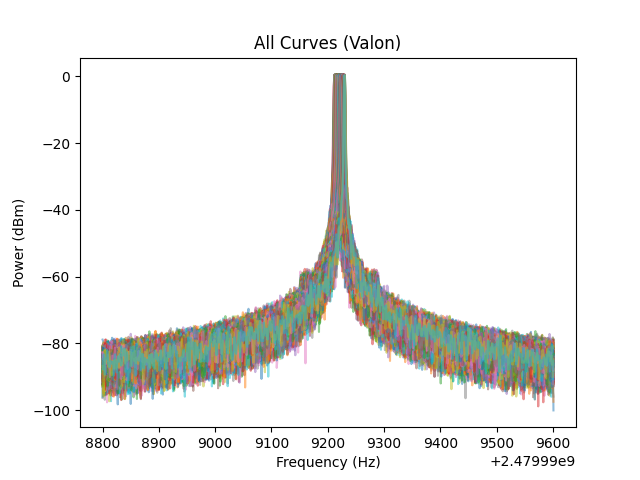

In [4]:
#vomit plot!
valonDf.plot(legend = False, alpha = .5)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (dBm)')
plt.title('All Curves (Valon)')

Text(0.5, 1.0, 'All Curves (DSG830)')

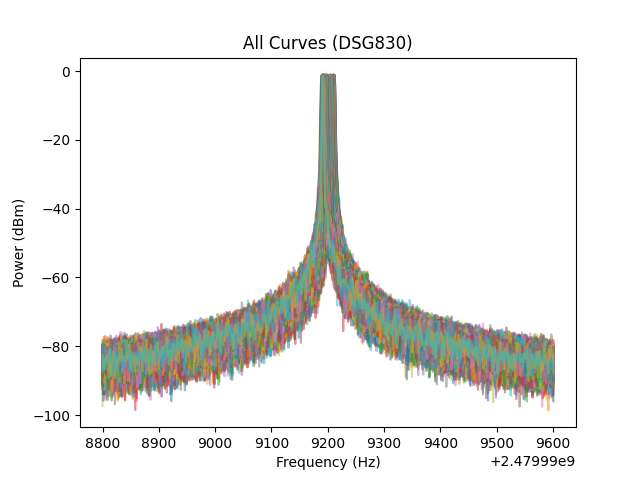

In [77]:
#vomit plot! DSG830
dsgDf.plot(legend = False, alpha = .5)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (dBm)')
plt.title('All Curves (DSG830)')

Text(0.5, 1.0, 'Log Mean (Valon)')

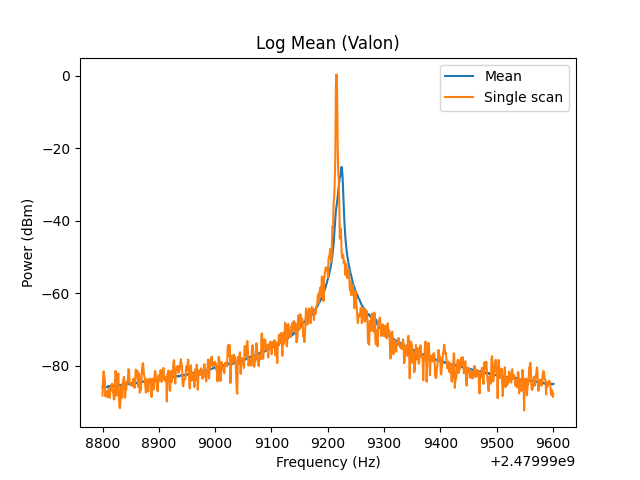

In [5]:
#Log average
plt.figure()
valonDf.mean(axis=1).plot(label = 'Mean')
valonDf.iloc[:, 100].plot(label = 'Single scan')
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (dBm)')
plt.title('Log Mean (Valon)')

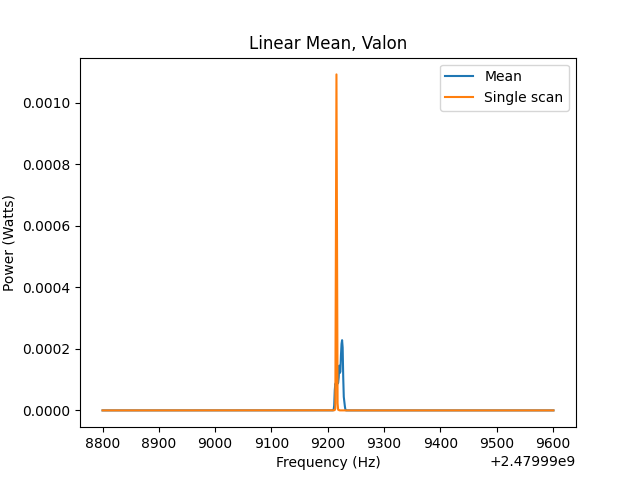

In [58]:
#linear average

def dbm2watts(dBm):
    watts = 10**((dBm - 30)/10)
    return watts

valonLinDf = pd.read_pickle('valonCh2_2480MHz_0dBm_10sScanTime_10ksScantime_0dBm_1HzRBW_801pts_801MHzSpan.pkl')
valonLinDf = valonLinDf.apply(dbm2watts)

plt.figure()
valonLinDf.mean(axis=1).plot(label = 'Mean')
valonLinDf.iloc[:, 100].plot(label = 'Single scan')
plt.title('Linear Mean, Valon')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (Watts)')
plt.legend()


Text(0.5, 1.0, 'Log Mean')

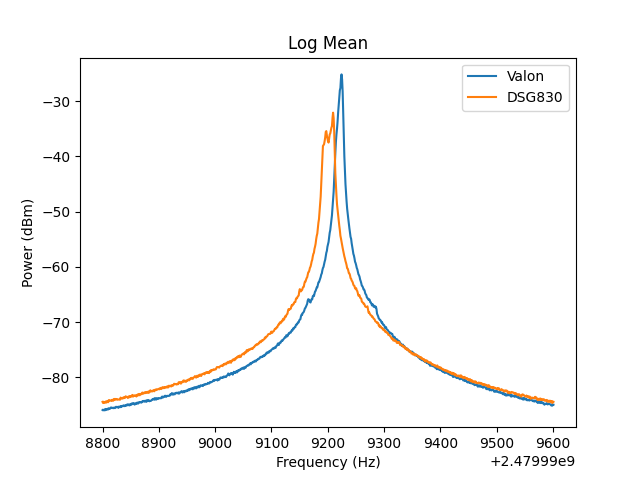

In [65]:
#Log average compare
plt.figure()
valonDf.mean(axis=1).plot(label = 'Valon')
dsgDf.mean(axis=1).plot(label = 'DSG830')
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (dBm)')
plt.title('Log Mean')

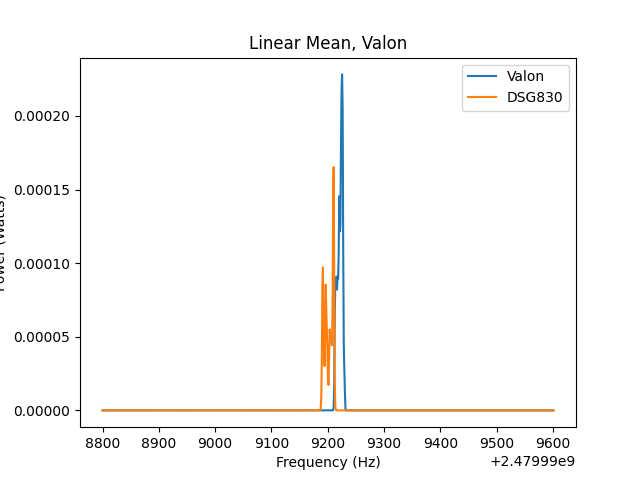

In [16]:
#linear average

def dbm2watts(dBm):
    watts = 10**((dBm - 30)/10)
    return watts

valonLinDf = pd.read_pickle('valonCh2_2480MHz_0dBm_10sScanTime_10ksScantime_0dBm_1HzRBW_801pts_801MHzSpan.pkl')
dsgLinDf = pd.read_pickle('DSG830_24799MHz_0dBm_10sScanTime_10ksScantime_0dBm_1HzRBW_801pts_801MHzSpan.pkl')
valonLinDf = valonLinDf.apply(dbm2watts)
dsgLinDf = dsgLinDf.apply(dbm2watts)

plt.figure()
valonLinDf.mean(axis=1).plot(label = 'Valon')
dsgLinDf.mean(axis=1).plot(label = 'DSG830')
plt.title('Linear Mean, Valon')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (Watts)')
plt.legend()

Text(0, 0.5, 'Power (dBm)')

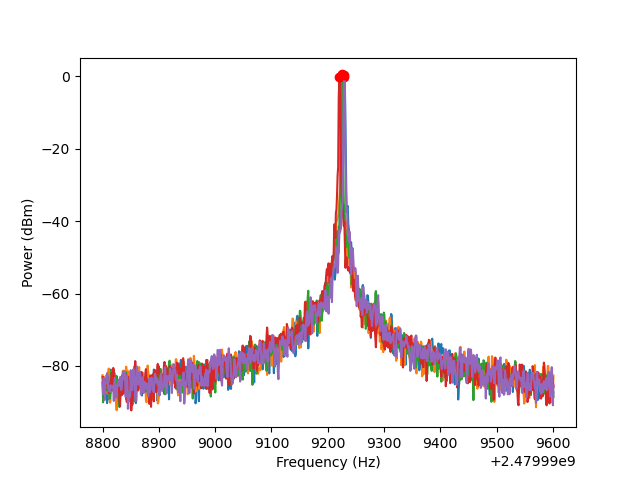

In [3]:
#demo of peak finding

plt.figure()
for scanNum in [0,10,50,300,999]:
    peakIdx =  int(sig.find_peaks(valonDf.iloc[:, scanNum], distance=800)[0])
    peakFreq = valonDf.index[peakIdx]
    valonDf.iloc[:, scanNum].plot(label = 'Single scan')
    plt.plot(peakFreq, valonDf.iloc[peakIdx, scanNum], 'ro')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (dBm)')


/tmp/ipykernel_238550/618496580.py:28: FutureWarning: Indexing with a float is deprecated, and will raise an IndexError in pandas 2.0. You can manually convert to an integer key instead.
  peakFreqArrValon[i] = valonDf.index[idx]
/tmp/ipykernel_238550/618496580.py:32: FutureWarning: Indexing with a float is deprecated, and will raise an IndexError in pandas 2.0. You can manually convert to an integer key instead.
  peakFreqArrDsg[i] = dsgDf.index[idx]


Text(0.5, 1.0, 'Peak frequency vs scan number')

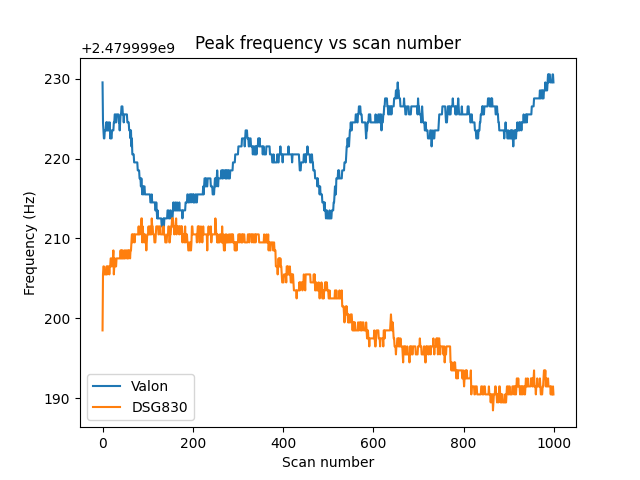

In [28]:
from cProfile import label


nScansValon = len(valonDf.iloc[0,:])
peakIdxArrValon = np.zeros(nScansValon)
peakFreqArrValon = np.zeros(nScansValon)

nScansDsg = len(dsgDf.iloc[0,:])
peakIdxArrDsg = np.zeros(nScansDsg)
peakFreqArrDsg = np.zeros(nScansDsg)



for scan in range(nScansValon):
    #Find peak of each scan to create time series of peak wandering
    #find_peaks returns tuple; (single element arr of indicies, empty dict). Take int of single element arr
    # Distance = 800 only gets largest peak.
    peakIdxArrValon[scan] =  int(sig.find_peaks(valonDf.iloc[:, scan], distance=800)[0])
    peakIdxArrDsg[scan] =  int(sig.find_peaks(dsgDf.iloc[:, scan], distance=800)[0])

for scan in range(nScansDsg):
    #Find peak of each scan to create time series of peak wandering
    #find_peaks returns tuple; (single element arr of indicies, empty dict). Take int of single element arr
    # Distance = 800 only gets largest peak.
    peakIdxArrDsg[scan] =  int(sig.find_peaks(dsgDf.iloc[:, scan], distance=800)[0])




for i, idx in enumerate(peakIdxArrValon):
    #convert from idx that scipy find_peaks returns to actual frequency
    peakFreqArrValon[i] = valonDf.index[idx]

for i, idx in enumerate(peakIdxArrDsg):
    #convert from idx that scipy find_peaks returns to actual frequency
    peakFreqArrDsg[i] = dsgDf.index[idx]



plt.figure()
plt.plot(peakFreqArrValon, label = 'Valon')
plt.plot(peakFreqArrDsg, label = 'DSG830')

plt.xlabel('Scan number')
plt.ylabel('Frequency (Hz)')
plt.legend()
plt.title('Peak frequency vs scan number')


/tmp/ipykernel_523882/875382567.py:13: FutureWarning: Indexing with a float is deprecated, and will raise an IndexError in pandas 2.0. You can manually convert to an integer key instead.
  peakFreqArrValon12[i] = valon12hrDf.index[idx]


(array([ 12.,   9.,  24.,  50., 212., 204., 170., 128., 229.,  63.,  49.,
         22.,   8.,   4.,   8.,   3.,   4.,  17.,  26.,  76., 119., 299.,
        215., 265., 208., 367., 128.,  41.,  20.,  20.]),
 array([2.47999915e+09, 2.47999915e+09, 2.47999915e+09, 2.47999915e+09,
        2.47999915e+09, 2.47999915e+09, 2.47999915e+09, 2.47999916e+09,
        2.47999916e+09, 2.47999916e+09, 2.47999916e+09, 2.47999916e+09,
        2.47999916e+09, 2.47999916e+09, 2.47999916e+09, 2.47999917e+09,
        2.47999917e+09, 2.47999917e+09, 2.47999917e+09, 2.47999917e+09,
        2.47999917e+09, 2.47999917e+09, 2.47999917e+09, 2.47999918e+09,
        2.47999918e+09, 2.47999918e+09, 2.47999918e+09, 2.47999918e+09,
        2.47999918e+09, 2.47999918e+09, 2.47999918e+09]),
 <BarContainer object of 30 artists>)

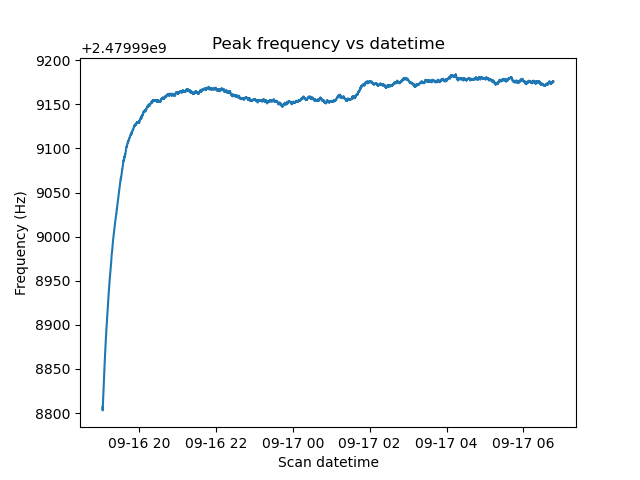

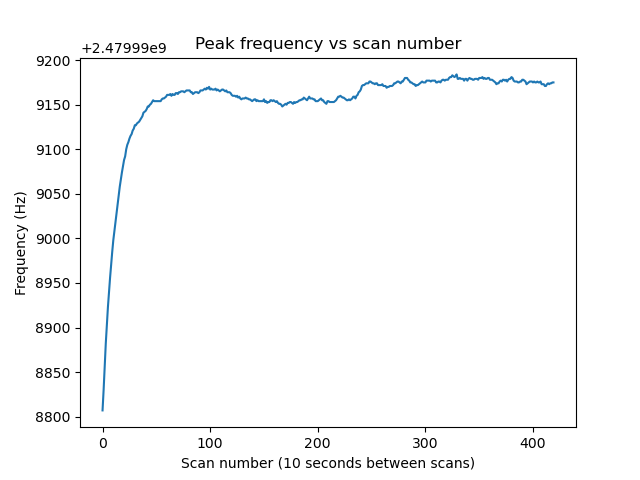

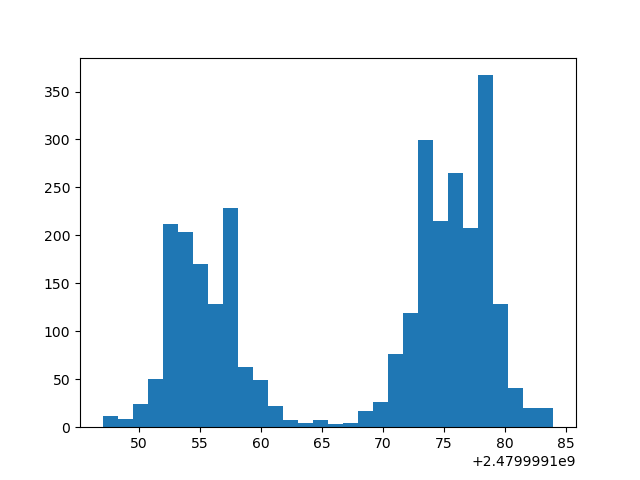

In [25]:

nScansValon12 = len(valon12hrDf.iloc[0,:])
peakIdxArrValon12 = np.zeros(nScansValon12)
peakFreqArrValon12 = np.zeros(nScansValon12)

for scan in range(nScansValon12):
    #Find peak of each scan to create time series of peak wandering
    #find_peaks returns tuple; (single element arr of indicies, empty dict). Take int of single element arr
    # Distance = 800 only gets largest peak.
    peakIdxArrValon12[scan] =  int(sig.find_peaks(valon12hrDf.iloc[:, scan], distance=800)[0])
    
for i, idx in enumerate(peakIdxArrValon12):
    #convert from idx that scipy find_peaks returns to actual frequency
    peakFreqArrValon12[i] = valon12hrDf.index[idx]

    
plt.figure()
plt.plot(list(valon12hrDf), peakFreqArrValon12, label = 'Valon 12 hour')
plt.xlabel('Scan datetime')
#plt.xlabel(list(valon12hrDf))
plt.ylabel('Frequency (Hz)')
#plt.legend()
plt.title('Peak frequency vs datetime')


samplesToCut = 1200


plt.figure()
plt.plot(peakFreqArrValon12[0::10], label = 'Valon 12 hour')
plt.xlabel('Scan number (10 seconds between scans)')
plt.ylabel('Frequency (Hz)')
plt.title('Peak frequency vs scan number')
#plt.xlim(samplesToCut, len(peakFreqArrValon12))
#plt.ylim(2479999145, 2479999190)

plt.figure()
plt.hist(peakFreqArrValon12[samplesToCut:], bins = 30)

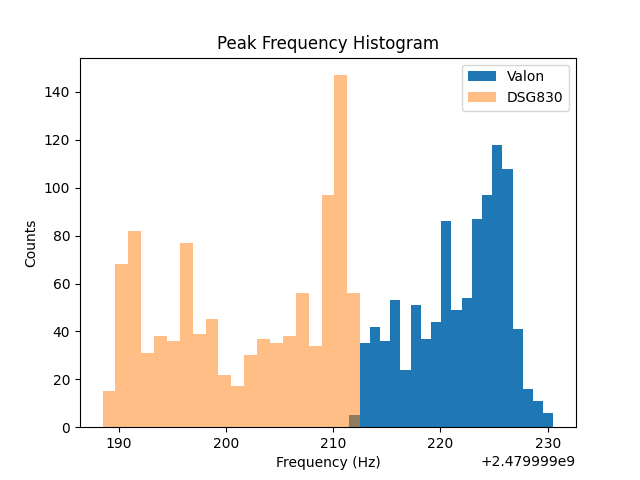

In [ ]:
plt.figure()
plt.hist(peakFreqArrValon, bins =20, label='Valon', alpha = 1);
plt.hist(peakFreqArrDsg, bins =20, label='DSG830', alpha = .5);
plt.xlabel('Frequency (Hz)')
plt.ylabel('Counts')
plt.title('Peak Frequency Histogram')
plt.legend()

In [45]:
valonMeanBoot = stat.bootstrap((peakFreqArrValon,), np.mean, confidence_level=.9)
dsgMeanBoot = stat.bootstrap((peakFreqArrDsg,), np.mean, confidence_level=.9)
valonStdBoot = stat.bootstrap((peakFreqArrValon,), np.std, confidence_level=.9)
dsgStdBoot = stat.bootstrap((peakFreqArrDsg,), np.std, confidence_level=.9)

In [76]:
print('Valon 3 hour stability run:', round(peakFreqArrValon.mean(),1), '+-', round(peakFreqArrValon.std(), 2),'Hz')
print('Valon STD 90% confidence interval = ', valonStdBoot.confidence_interval.high, ',', valonStdBoot.confidence_interval.low)
print()
print('DSG830 3 hour stability run:', round(peakFreqArrDsg.mean(),1), '+-', round(peakFreqArrDsg.std(), 2),'Hz')
print('DSG STD 90% confidence interval = ', dsgStdBoot.confidence_interval.high, ',', dsgStdBoot.confidence_interval.low)

Valon 3 hour stability run: 2479999221.7 +- 4.59 Hz
Valon STD 90% confidence interval =  4.723551455734805 , 4.464459394298904

DSG830 3 hour stability run: 2479999201.8 +- 7.49 Hz
DSG STD 90% confidence interval =  7.633758190952872 , 7.352035378441332


DSG STD 90% confidence interval =  7.633758190952872 , 7.352035378441332
Valon STD 90% confidence interval =  4.723551455734805 , 4.464459394298904
